In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import numpy as np

In [5]:
df = pd.read_csv("C:/Users/vgaya/Downloads/tips (data for regression problem).csv")

In [7]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [13]:
df.shape

(244, 7)

In [15]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [19]:
df.duplicated().sum()

1

In [27]:
df.drop_duplicates(inplace=True)

In [29]:
df.shape

(243, 7)

In [31]:
df = pd.get_dummies(df, drop_first=True)

In [37]:
X = df.drop('tip', axis=1)
y = df['tip']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

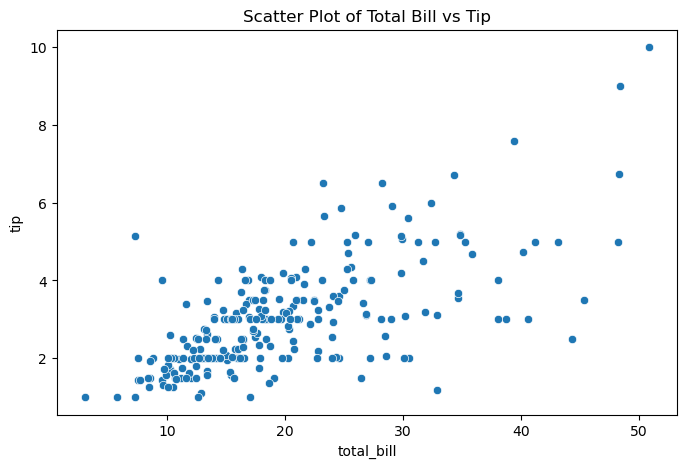

In [39]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="total_bill", y="tip")
plt.title("Scatter Plot of Total Bill vs Tip")
plt.show()

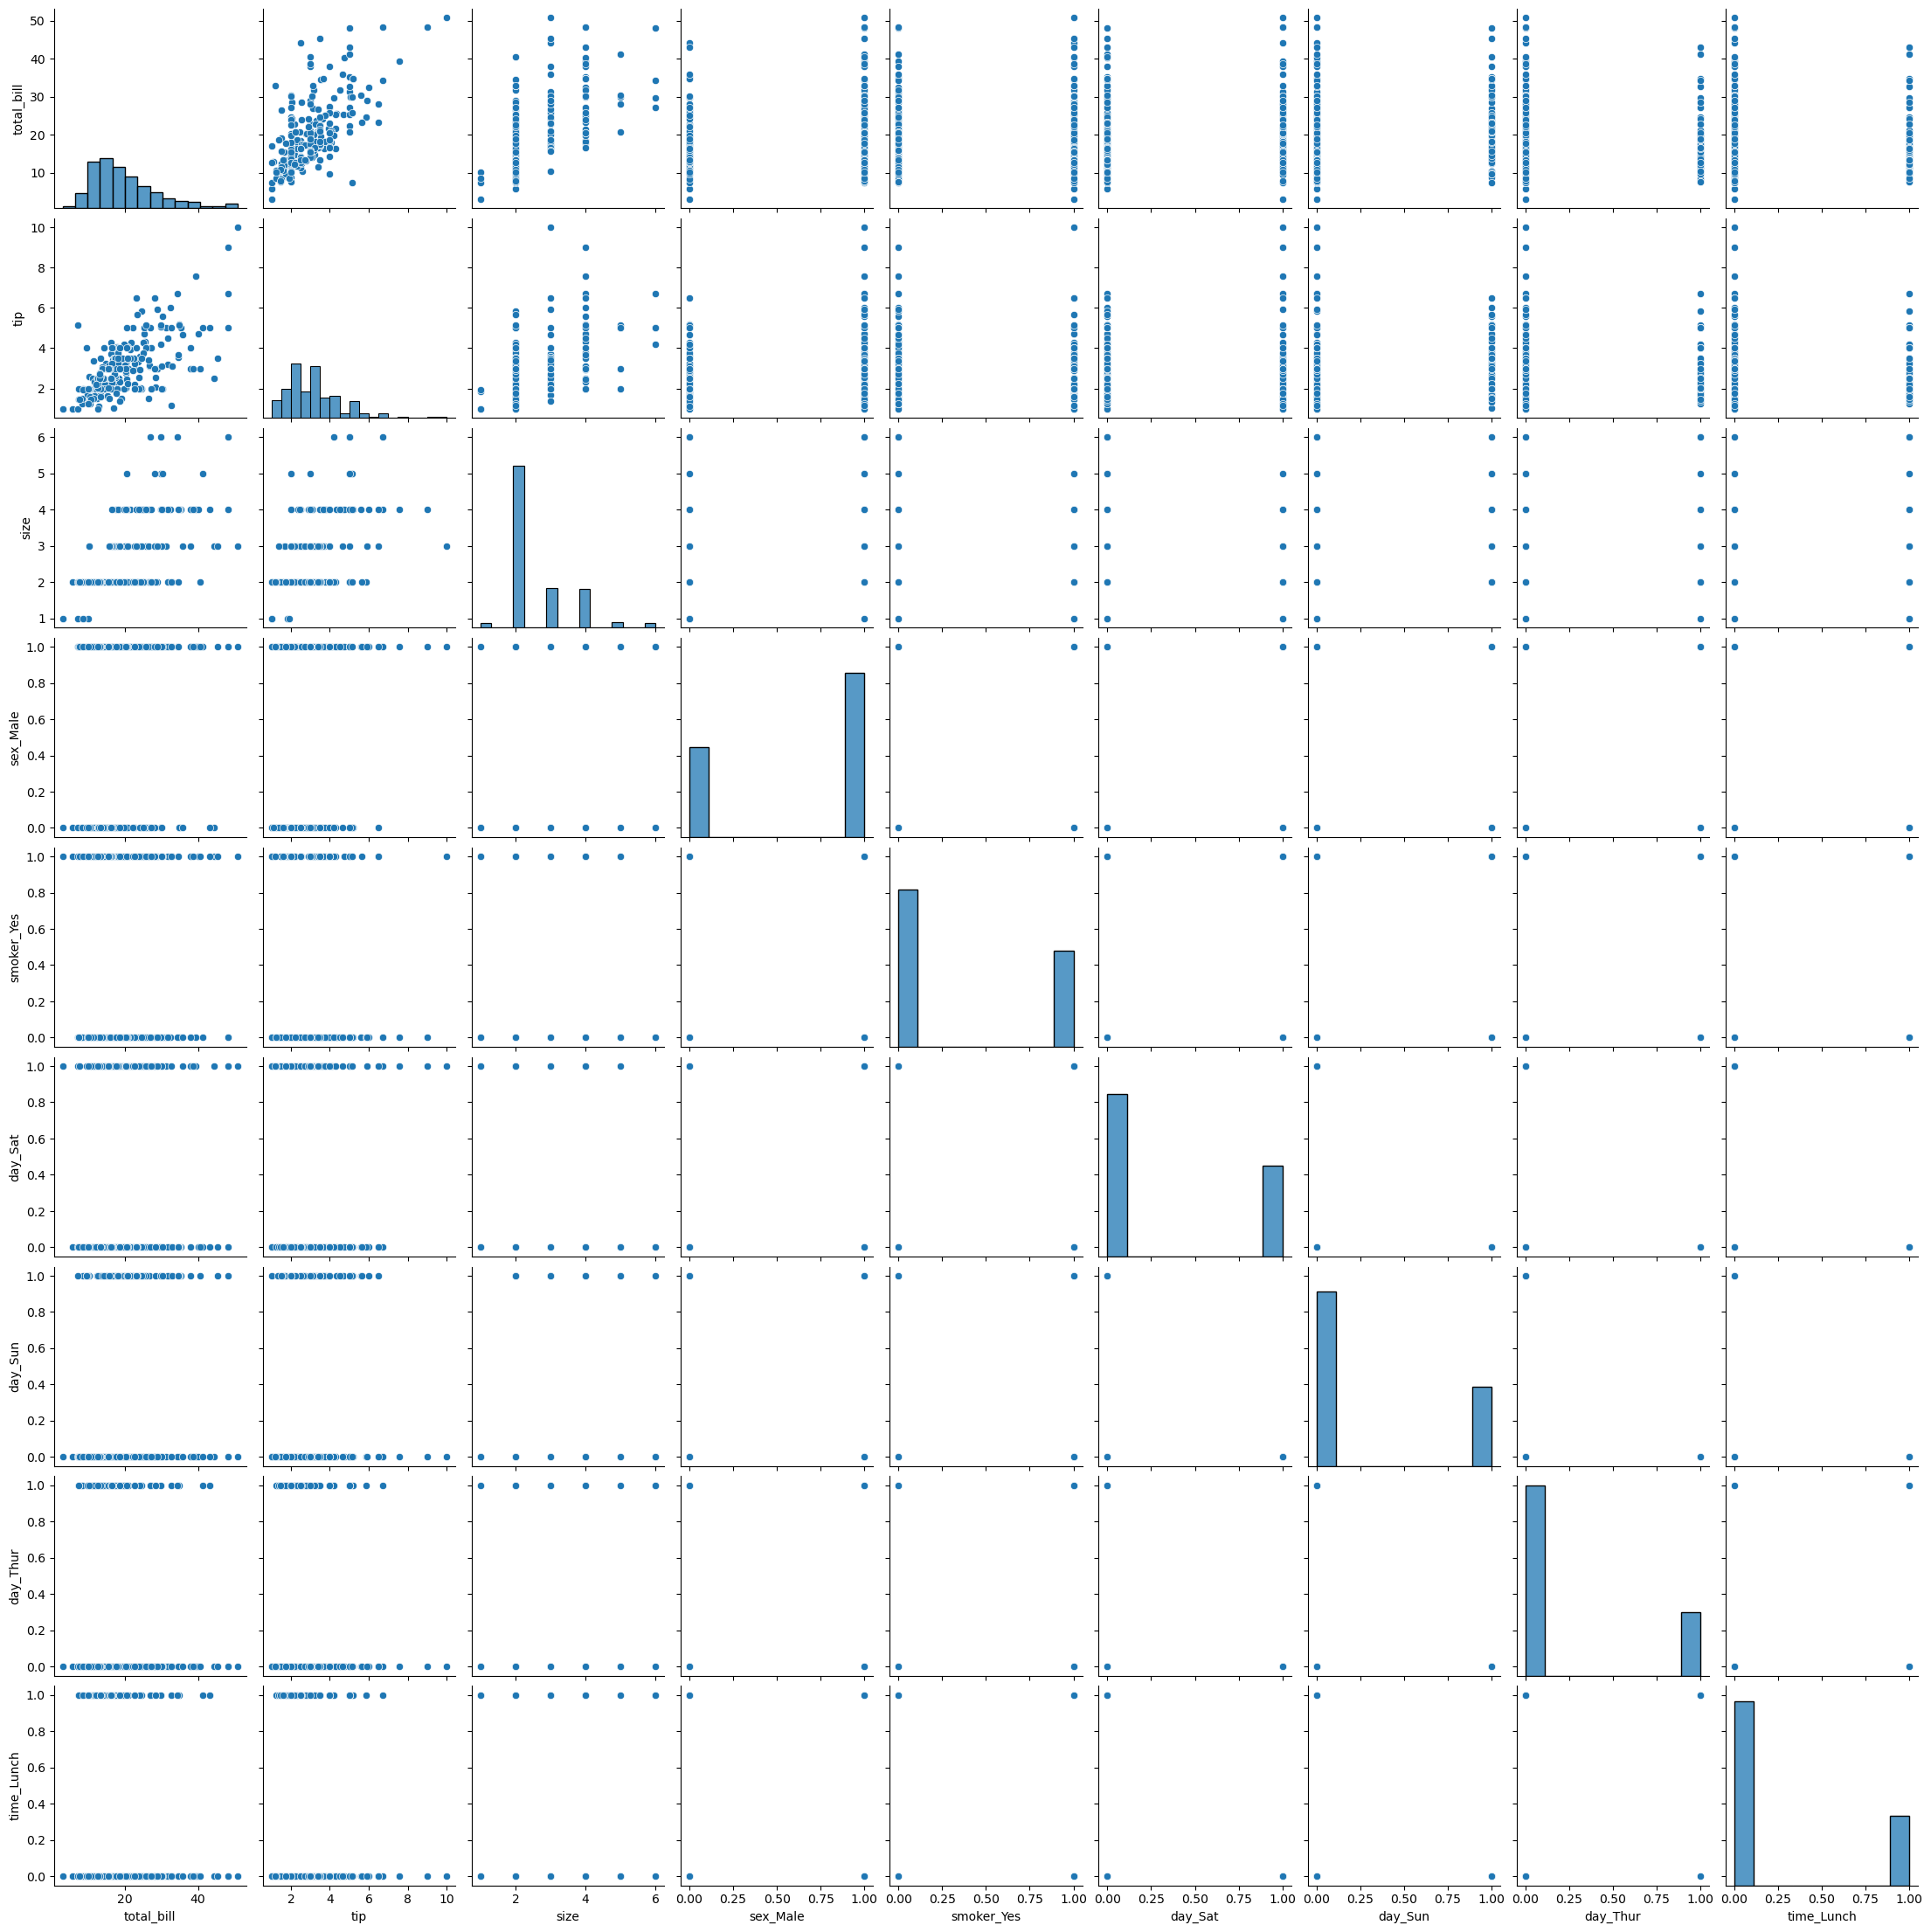

In [41]:
sns.pairplot(df)
plt.show()

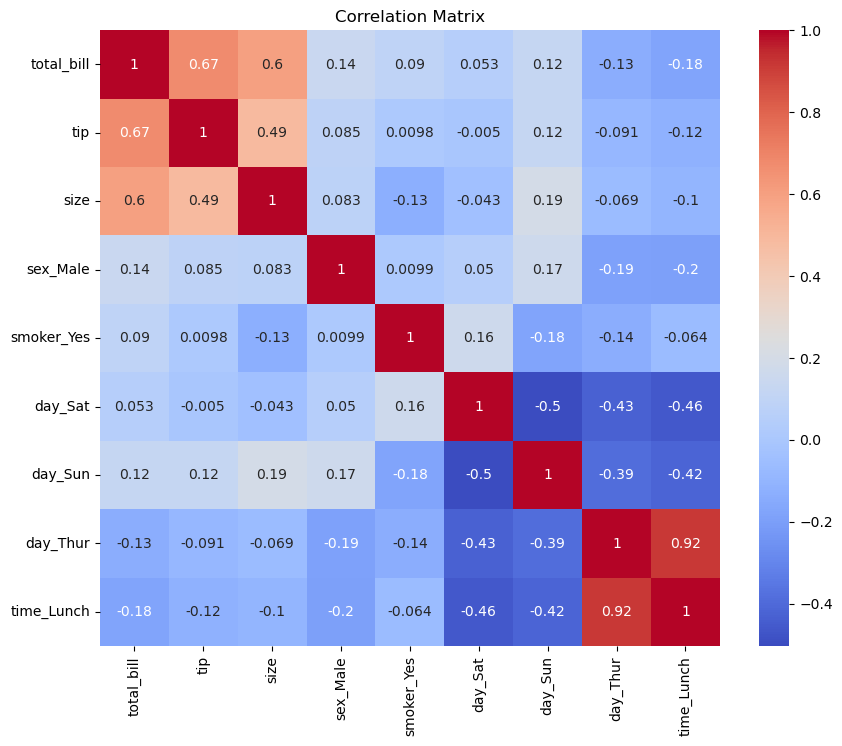

In [43]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [45]:
import statsmodels.formula.api as smf
lin_model = smf.ols('tip ~ total_bill + size', data=df).fit()
rainbow_statistic, rainbow_p_value = sm.stats.diagnostic.linear_rainbow(lin_model)
print("Rainbow test p-value:", rainbow_p_value)

Rainbow test p-value: 0.0997456046936553


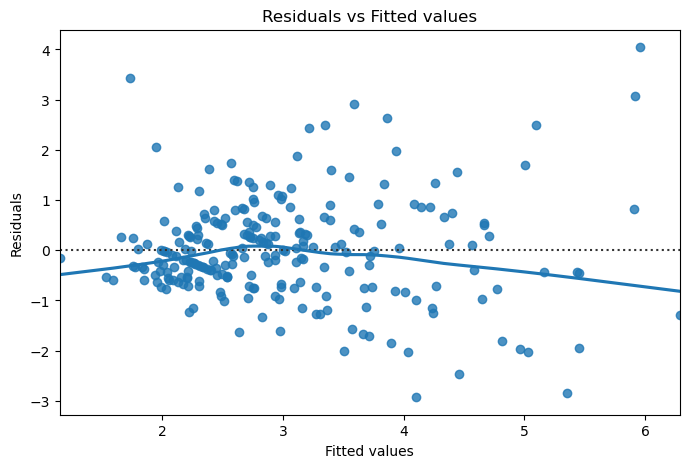

In [47]:
preds = lin_model.predict(X)
residuals = y - preds
plt.figure(figsize=(8, 5))
sns.residplot(x=preds, y=residuals, lowess=True)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted values")
plt.show()


In [49]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{model.__class__.__name__} - MSE: {mse:.4f}, R2 Score: {r2:.4f}")

In [51]:
lr = LinearRegression()
evaluate_model(lr, X_train, y_train, X_test, y_test)

LinearRegression - MSE: 1.1730, R2 Score: 0.5186


In [53]:
ridge = Ridge(alpha=1.0)
evaluate_model(ridge, X_train, y_train, X_test, y_test)

Ridge - MSE: 1.1699, R2 Score: 0.5198


In [55]:
lasso = Lasso(alpha=0.1)
evaluate_model(lasso, X_train, y_train, X_test, y_test)

Lasso - MSE: 1.1532, R2 Score: 0.5267


In [57]:
dt = DecisionTreeRegressor(random_state=42)
evaluate_model(dt, X_train, y_train, X_test, y_test)

DecisionTreeRegressor - MSE: 1.3241, R2 Score: 0.4566


In [59]:
rf = RandomForestRegressor(random_state=42)
evaluate_model(rf, X_train, y_train, X_test, y_test)


RandomForestRegressor - MSE: 1.0998, R2 Score: 0.5486


In [61]:
svr = SVR(kernel='linear')
evaluate_model(svr, X_train, y_train, X_test, y_test)

SVR - MSE: 1.1067, R2 Score: 0.5458


In [63]:
knn = KNeighborsRegressor(n_neighbors=5)
evaluate_model(knn, X_train, y_train, X_test, y_test)

KNeighborsRegressor - MSE: 1.6349, R2 Score: 0.3290


In [65]:
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

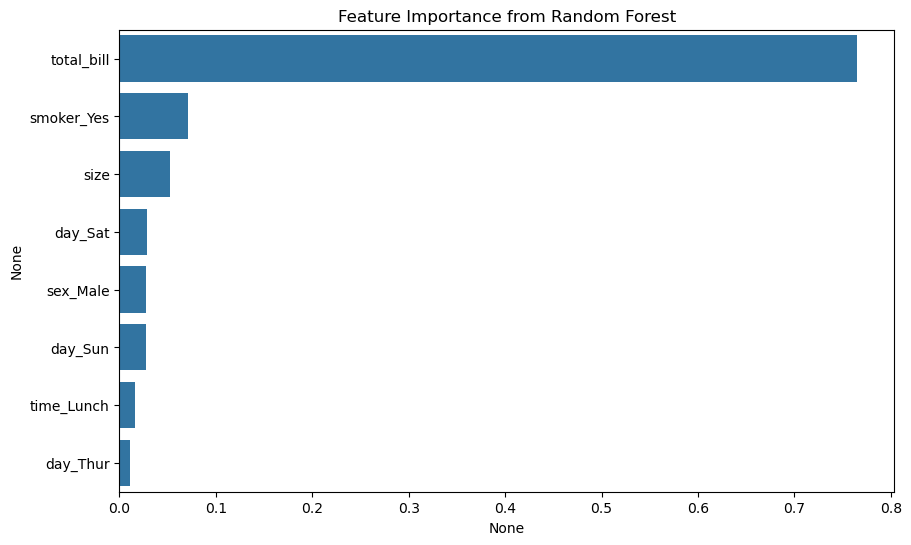

In [67]:
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title("Feature Importance from Random Forest")
plt.show()